In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data
Go here: https://drive.google.com/drive/folders/0B5Wu8z15TIbiLUhvcWxaMDJCRGs

Get this data set: 10000-Patients.zip

unzip it into the Data folder

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [ ]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)


In [2]:
# 1) 
datafile = '..\Data\PatientCorePopulatedTable.txt'
patient_df = pd.read_csv(datafile, delimiter = '\t')
patient_df.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,Male,1975-01-04 14:49:59.587,White,Single,Unknown,15.60
1,801AFB51-036F-40E3-BDFE-FED4844BE275,Male,1964-09-06 13:15:43.043,White,Unknown,English,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,Female,1953-01-14 06:00:19.330,White,Married,English,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,Female,1986-04-28 12:42:02.007,Unknown,Unknown,Unknown,95.80
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,Female,1963-08-26 10:57:55.183,White,Unknown,English,18.08


In [3]:
datafile = '..\Data\LabsCorePopulatedTable.txt'
labs_df = pd.read_csv(datafile, delimiter = '\t')
labs_df.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMATOCRIT,40.7,%,1946-09-07 22:20:26.677
1,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: ANION GAP,8.4,mmol/L,1946-09-07 11:52:58.600
2,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: LYMPHOCYTES,4.7,k/cumm,1946-09-07 06:08:57.303
3,915BC24E-8C44-4D33-A386-CEA965B83F32,1,CBC: HEMOGLOBIN,15.9,gm/dl,1946-09-07 19:16:10.057
4,915BC24E-8C44-4D33-A386-CEA965B83F32,1,METABOLIC: SODIUM,146.6,mmol/L,1946-09-07 14:03:11.003


In [4]:
datafile = '..\Data\AdmissionsCorePopulatedTable.txt'
admissions_df = pd.read_csv(datafile, delimiter = '\t')
admissions_df.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,1,1974-07-26 15:05:30.333,1974-07-30 22:27:44.987
1,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,2,1983-11-12 03:34:39.083,1983-11-30 19:05:54.040
2,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,3,1998-09-28 12:08:17.843,1998-10-08 12:56:31.233
3,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,4,1999-04-03 01:49:32.610,1999-04-09 14:04:29.210
4,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,5,2001-11-26 03:07:07.303,2001-12-01 08:22:03.783


In [5]:
datafile = '..\Data\AdmissionsDiagnosesCorePopulatedTable.txt'
diagnoses_df = pd.read_csv(datafile, delimiter = '\t')
diagnoses_df.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,Drug or chemical induced diabetes mellitus wit...
1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,Cardiac failure due to anesthesia during pregn...
2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,"Pathological fracture in neoplastic disease, r..."
3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,Disorders of hypoglossal nerve
4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,Malignant neoplasm of short bones of right low...


In [ ]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type



In [6]:
dfs = [patient_df,labs_df, admissions_df, diagnoses_df]

In [7]:
for df in dfs:
    colnames = list(df)
    for names in colnames: 
        if 'Date' in names:
            print(names)
            df[names] = pd.to_datetime(df[names])
            print(df[names].dtypes)
        else:
            print(names)
            print(df[names].dtypes)

PatientID
object
PatientGender
object
PatientDateOfBirth
datetime64[ns]
PatientRace
object
PatientMaritalStatus
object
PatientLanguage
object
PatientPopulationPercentageBelowPoverty
float64
PatientID
object
AdmissionID
int64
LabName
object
LabValue
float64
LabUnits
object
LabDateTime
datetime64[ns]
PatientID
object
AdmissionID
int64
AdmissionStartDate
datetime64[ns]
AdmissionEndDate
datetime64[ns]
PatientID
object
AdmissionID
int64
PrimaryDiagnosisCode
object
PrimaryDiagnosisDescription
object


In [ ]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# '327A3C2F-B234-400B-B994-833073C014C0'



In [8]:
# print  out the records for patient x
for df in dfs: 
    print(df.loc[df.PatientID=='327A3C2F-B234-400B-B994-833073C014C0'])


                                 PatientID PatientGender  \
8097  327A3C2F-B234-400B-B994-833073C014C0        Female   

          PatientDateOfBirth PatientRace PatientMaritalStatus PatientLanguage  \
8097 1962-06-14 05:01:30.953       Asian               Single         English   

      PatientPopulationPercentageBelowPoverty  
8097                                    18.96  
                                    PatientID  AdmissionID  \
5846797  327A3C2F-B234-400B-B994-833073C014C0            1   
5846798  327A3C2F-B234-400B-B994-833073C014C0            1   
5846799  327A3C2F-B234-400B-B994-833073C014C0            1   
5846800  327A3C2F-B234-400B-B994-833073C014C0            1   
5846801  327A3C2F-B234-400B-B994-833073C014C0            1   
5846802  327A3C2F-B234-400B-B994-833073C014C0            1   
5846803  327A3C2F-B234-400B-B994-833073C014C0            1   
5846804  327A3C2F-B234-400B-B994-833073C014C0            1   
5846805  327A3C2F-B234-400B-B994-833073C014C0            1   


In [9]:
# save the records for patient x
patient_x = patient_df.loc[patient_df.PatientID=='327A3C2F-B234-400B-B994-833073C014C0']
labs_x = labs_df.loc[labs_df.PatientID=='327A3C2F-B234-400B-B994-833073C014C0']
admissions_x = admissions_df.loc[admissions_df.PatientID=='327A3C2F-B234-400B-B994-833073C014C0']
diagnoses_x = diagnoses_df.loc[diagnoses_df.PatientID=='327A3C2F-B234-400B-B994-833073C014C0']

In [10]:
labs_x.shape

(1203, 6)

In [ ]:
# Holy cow!  this patient has 1203 lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#         

In [11]:
#1)  
# group labs by patient name
labs_grouped = labs_df.groupby(['PatientID'])

# count how large each group is
labs_per_patient = labs_grouped.size()

# What is the average number of labs 
print('average number of labs is...')
print(labs_per_patient.mean())

# What is the std number of labs 
print('standard dev of labs is...')
print(labs_per_patient.std())


average number of labs is...
1072.6505
standard dev of labs is...
522.6801350750865


In [12]:
# 2)
labs_grouped_by_lab = labs_df.groupby(['LabName'])

# count how large each group is
list_of_labs = labs_grouped_by_lab.size()

list_of_labs

LabName
CBC: ABSOLUTE LYMPHOCYTES        306883
CBC: ABSOLUTE NEUTROPHILS        306215
CBC: BASOPHILS                   305953
CBC: EOSINOPHILS                 306886
CBC: HEMATOCRIT                  306557
CBC: HEMOGLOBIN                  306150
CBC: LYMPHOCYTES                 306957
CBC: MCH                         306592
CBC: MCHC                        305947
CBC: MEAN CORPUSCULAR VOLUME     305959
CBC: MONOCYTES                   306745
CBC: NEUTROPHILS                 306354
CBC: PLATELET COUNT              306959
CBC: RDW                         306452
CBC: RED BLOOD CELL COUNT        306265
CBC: WHITE BLOOD CELL COUNT      306248
METABOLIC: ALBUMIN               306289
METABOLIC: ALK PHOS              306454
METABOLIC: ALT/SGPT              306431
METABOLIC: ANION GAP             306375
METABOLIC: AST/SGOT              306780
METABOLIC: BILI TOTAL            306254
METABOLIC: BUN                   306571
METABOLIC: CALCIUM               306038
METABOLIC: CARBON DIOXIDE       

In [13]:
labs_df.shape

(10726505, 6)

In [14]:
list_of_labs.sum()

10726505

In [ ]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

In [15]:
# 1) 
# group data by patient and by lab
patient_labs_groups = labs_df.groupby(['LabName','PatientID']).size()

# find largest group
biggest_value = patient_labs_groups.max()

assert biggest_value == 117

In [16]:
# find largest group
largest_pat_lab_group = patient_labs_groups.idxmax()
largest_pat_lab_group

('METABOLIC: BILI TOTAL', '3D33CC75-3EF0-49B5-9524-B4E8A7C08F25')

In [17]:
# 2)
# partition out the labs_df to only have the patient and labs of interest
patient_of_interest = labs_df.loc[labs_df.PatientID==largest_pat_lab_group[1]]
#patient_of_interest
patient_of_interest = patient_of_interest.loc[patient_of_interest.LabName == largest_pat_lab_group[0]]

In [18]:
patient_of_interest.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5551849,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,1.1,mg/dL,1983-08-27 22:51:39.697
5551903,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,1.1,mg/dL,1983-08-29 23:04:13.783
5551948,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.6,mg/dL,1983-09-02 15:16:57.123
5551968,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.9,mg/dL,1983-09-03 19:17:57.780
5551998,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.7,mg/dL,1983-09-04 09:29:50.733


C:\Users\emily\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


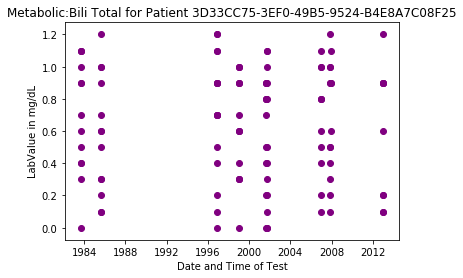

In [19]:
plt.scatter(patient_of_interest.LabDateTime,
        patient_of_interest.LabValue, color = 'purple')

plt.title('Metabolic:Bili Total for Patient 3D33CC75-3EF0-49B5-9524-B4E8A7C08F25')
plt.xlabel('Date and Time of Test')
plt.ylabel('LabValue in mg/dL')
plt.show()

In [ ]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for January 19, 1992?

1. I would tell my PI that the lab values ranged from 0.1 to 1.2 mg/dL on Aug 6, 1985. She would have to give me the exact time of day for which she wanted a lab value. Even with the exact time, it would be difficult to compare this data with another data set. This data set looks at measures of metabolism. You would have to take into account what people ate, how much they ate, and when they ate to compare data sets. For data that was taken over 30 years ago, it might be difficult to find this data.
2. According to the plot, there are no lab values on January 19, 1992. If lab values were needed for this date, you could potentially interpolate the data but even that seems risky. 

## Yes!